In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
im1 = rasterio.open('LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif')
im2 = rasterio.open('LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif')

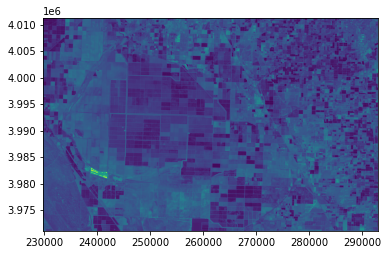

<AxesSubplot:>

In [3]:
plot.show(im1)

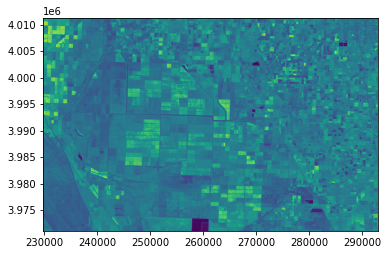

<AxesSubplot:>

In [4]:
plot.show(im2)

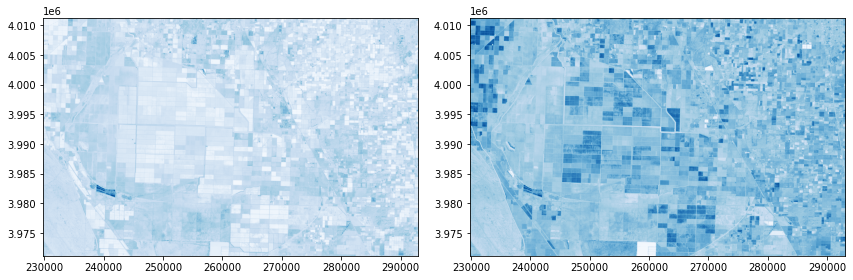

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(im1, ax=ax1, cmap='Blues') #red
plot.show(im2, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [6]:
red = im1.read(1).astype('float64')
nir = im2.read(1).astype('float64')

In [7]:
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]

array([[0.52601559, 0.525987  , 0.5271335 , 0.52442396, 0.52136479],
       [0.52721873, 0.52758588, 0.52751975, 0.5246888 , 0.52311125],
       [0.52774803, 0.53187488, 0.52999779, 0.52700989, 0.52593861],
       [0.53090761, 0.52997044, 0.52947468, 0.52603985, 0.52432536],
       [0.5317881 , 0.52931154, 0.53190956, 0.52842704, 0.52400689]])

In [8]:
ndviImage = rasterio.open('ndviImage.tiff','w',driver = 'Gtiff',
                          width = im1.width, 
                          height = im1.height, 
                          count = 1, crs = im1.crs, 
                          transform = im1.transform, 
                          dtype = 'float64')
ndviImage.write(ndvi,1)
ndviImage.close()

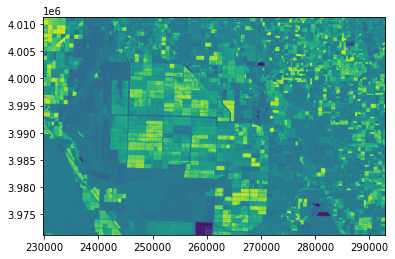

<AxesSubplot:>

In [9]:
ndvi = rasterio.open('ndviImage.tiff')
fig = plt.figure(figsize=(10,4))
plot.show(ndvi)